<a href="https://colab.research.google.com/github/Mlu1eki/COMP721_PROJECT/blob/main/Predicitive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load the dataset from a CSV file
data = pd.read_csv("player_playoffs_career.csv")

In [ ]:
data.head(3)

,ilkid,firstname,lastname,leag,gp,minutes,pts,dreb,oreb,reb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,ABDELAL01,Alaa,Abdelnaby,N,17,106,38,17,3,20,...,0,1,11,11,40,18,4,2,0,0
1,ABDULKA01,Kareem,Abdul-jabbar,N,237,8851,5762,833,355,2481,...,150,399,404,787,4422,2356,1419,1050,4,0
2,ABDULMA01,Mahmo,Abdul-rauf,N,15,415,195,18,5,23,...,7,1,22,37,187,69,45,43,49,14


In [ ]:
row, col = data.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 2055 rows and 21 columns.


In [ ]:
print("Number of duplicate data : ",data.duplicated().sum())

Number of duplicate data :  0


In [ ]:
# Join the "name" and "surname" columns into a new "player name" column
data['player name'] = data['firstname'] + ' ' + data['lastname']

In [ ]:
data = data.drop(columns=['firstname', 'lastname'])

In [ ]:
data.rename(columns={
    'leag': 'League',
    'gp': 'Games_Played',
    'W': 'Wins',
    'L': 'Losses',
    'minutes': 'Minutes_Played',
    'pts': 'Total_Points',
    'dreb': 'Defensive_Rebounds',
    'oreb': 'Offensive_Rebounds',
    'reb': 'Total_Rebounds',
    'asts': 'Assists',
    'stl': 'Steals',
    'blk': 'Blocks',
    'pf': 'Personal_Fouls',
    'fga': 'Field_Goals_Attempted',
    'fgm': 'Field_Goals_Made',
    'fta': 'Free_Throws_Attempted',
    'ftm': 'Free_Throws_Made',
    'tpa': 'Three_Point_FG_Attempted',
    'tpm': 'Three_Point_FG_Made'
}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ilkid                     2055 non-null   object
 1   League                    2055 non-null   object
 2   Games_Played              2055 non-null   int64 
 3   Minutes_Played            2055 non-null   int64 
 4   Total_Points              2055 non-null   int64 
 5   Defensive_Rebounds        2055 non-null   int64 
 6   Offensive_Rebounds        2055 non-null   int64 
 7   Total_Rebounds            2055 non-null   int64 
 8   Assists                   2055 non-null   int64 
 9   Steals                    2055 non-null   int64 
 10  Blocks                    2055 non-null   int64 
 11  turnover                  2055 non-null   int64 
 12  Personal_Fouls            2055 non-null   int64 
 13  Field_Goals_Attempted     2055 non-null   int64 
 14  Field_Goals_Made        

In [ ]:
data.isna().sum()

ilkid                       0
League                      0
Games_Played                0
Minutes_Played              0
Total_Points                0
Defensive_Rebounds          0
Offensive_Rebounds          0
Total_Rebounds              0
Assists                     0
Steals                      0
Blocks                      0
turnover                    0
Personal_Fouls              0
Field_Goals_Attempted       0
Field_Goals_Made            0
Free_Throws_Attempted       0
Free_Throws_Made            0
Three_Point_FG_Attempted    0
Three_Point_FG_Made         0
player name                 0
dtype: int64

In [ ]:
data.describe(include= np.number)

,Games_Played,Minutes_Played,Total_Points,Defensive_Rebounds,Offensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,turnover,Personal_Fouls,Field_Goals_Attempted,Field_Goals_Made,Free_Throws_Attempted,Free_Throws_Made,Three_Point_FG_Attempted,Three_Point_FG_Made
count,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000
mean,28.067640,696.847202,300.644282,50.639903,22.579562,134.000000,65.148905,14.137713,9.575669,25.015572,73.121168,254.203406,114.175182,88.091484,65.850122,19.060341,6.443796
std,32.949118,1105.103268,549.992403,133.688180,59.718378,268.782014,137.851783,34.847267,31.567226,60.849414,102.457455,443.287398,208.375652,170.813998,128.282099,62.338299,22.160687
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,41.000000,17.000000,0.000000,0.000000,7.000000,3.000000,0.000000,0.000000,0.000000,8.000000,16.000000,6.000000,5.000000,3.000000,0.000000,0.000000
50%,16.000000,246.000000,87.000000,1.000000,0.000000,41.000000,16.000000,0.000000,0.000000,1.000000,32.000000,80.000000,33.000000,26.000000,18.000000,0.000000,0.000000
75%,38.000000,861.000000,335.500000,39.000000,18.000000,141.000000,69.500000,11.000000,6.000000,20.500000,97.000000,295.500000,128.000000,94.000000,69.000000,4.000000,1.000000
max,237.000000,8851.000000,5987.000000,1560.000000,741.000000,4104.000000,2346.000000,395.000000,472.000000,696.000000,787.000000,4497.000000,2356.000000,1995.000000,1463.000000,820.000000,320.000000


In [ ]:
data

,ilkid,League,Games_Played,Minutes_Played,Total_Points,Defensive_Rebounds,Offensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,turnover,Personal_Fouls,Field_Goals_Attempted,Field_Goals_Made,Free_Throws_Attempted,Free_Throws_Made,Three_Point_FG_Attempted,Three_Point_FG_Made,player name
0,ABDELAL01,N,17,106,38,17,3,20,3,0,1,11,11,40,18,4,2,0,0,Alaa Abdelnaby
1,ABDULKA01,N,237,8851,5762,833,355,2481,767,150,399,404,787,4422,2356,1419,1050,4,0,Kareem Abdul-jabbar
2,ABDULMA01,N,15,415,195,18,5,23,35,7,1,22,37,187,69,45,43,49,14,Mahmo Abdul-rauf
3,ABDULTA01,N,13,178,68,24,17,41,11,4,4,4,14,63,24,24,20,3,0,Tariq Abdul-wahad
4,ABERNTO01,N,13,226,68,0,0,42,23,0,0,0,18,54,22,29,24,0,0,Tom Abernethy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,ZAWOLRO01,N,2,18,2,0,0,2,0,0,0,0,5,6,1,2,0,0,0,Robert Zawoluk
2051,ZELLEDA01,N,2,5,2,0,0,1,1,0,0,0,0,2,1,0,0,0,0,Dave Zeller
2052,ZELLEGA01,A,3,9,2,0,0,1,0,0,0,0,7,1,1,1,0,0,0,Gary Zeller
2053,ZELLEGA01,N,15,67,26,0,0,13,4,0,0,0,15,35,12,7,2,0,0,Gary Zeller


In [ ]:
data.describe(include= 'object')

,ilkid,League,player name
count,2055,2055,2055
unique,1956,2,1947
top,TRAPPJO01,N,George Johnson
freq,2,1811,4


In [ ]:
data.isna().sum()

ilkid                       0
League                      0
Games_Played                0
Minutes_Played              0
Total_Points                0
Defensive_Rebounds          0
Offensive_Rebounds          0
Total_Rebounds              0
Assists                     0
Steals                      0
Blocks                      0
turnover                    0
Personal_Fouls              0
Field_Goals_Attempted       0
Field_Goals_Made            0
Free_Throws_Attempted       0
Free_Throws_Made            0
Three_Point_FG_Attempted    0
Three_Point_FG_Made         0
player name                 0
dtype: int64

In [ ]:
fig_points_minutes_scatter = go.Figure()

fig_points_minutes_scatter.add_trace(go.Scatter(x=data['Minutes_Played'], y=data['Total_Points'],
                                               mode='markers', marker_color='orangered', opacity=0.7))

fig_points_minutes_scatter.update_layout(title='Points vs. Minutes Played',
                                         xaxis_title='Minutes Played',
                                         yaxis_title='Total Points',
                                         template='plotly_dark')

fig_points_minutes_scatter.show()

In [ ]:
radar_columns = ['Total_Points', 'Total_Rebounds', 'Assists', 'Steals', 'Blocks']

selected_players = data.sample(n=5)
fig_radar = go.Figure()

for index, player in selected_players.iterrows():
    fig_radar.add_trace(go.Scatterpolar(
        r=[player[column] for column in radar_columns],
        theta=radar_columns,
        fill='toself',
        name=player['player name']
    ))

fig_radar.update_layout(
    title='Player Comparison - Overall Performance',
    template='plotly_dark',
    polar=dict(
        radialaxis=dict(visible=True, range=[0,2000]),
    ),
)
fig_radar.show()

In [ ]:
data

,ilkid,League,Games_Played,Minutes_Played,Total_Points,Defensive_Rebounds,Offensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,turnover,Personal_Fouls,Field_Goals_Attempted,Field_Goals_Made,Free_Throws_Attempted,Free_Throws_Made,Three_Point_FG_Attempted,Three_Point_FG_Made,player name
0,ABDELAL01,N,17,106,38,17,3,20,3,0,1,11,11,40,18,4,2,0,0,Alaa Abdelnaby
1,ABDULKA01,N,237,8851,5762,833,355,2481,767,150,399,404,787,4422,2356,1419,1050,4,0,Kareem Abdul-jabbar
2,ABDULMA01,N,15,415,195,18,5,23,35,7,1,22,37,187,69,45,43,49,14,Mahmo Abdul-rauf
3,ABDULTA01,N,13,178,68,24,17,41,11,4,4,4,14,63,24,24,20,3,0,Tariq Abdul-wahad
4,ABERNTO01,N,13,226,68,0,0,42,23,0,0,0,18,54,22,29,24,0,0,Tom Abernethy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,ZAWOLRO01,N,2,18,2,0,0,2,0,0,0,0,5,6,1,2,0,0,0,Robert Zawoluk
2051,ZELLEDA01,N,2,5,2,0,0,1,1,0,0,0,0,2,1,0,0,0,0,Dave Zeller
2052,ZELLEGA01,A,3,9,2,0,0,1,0,0,0,0,7,1,1,1,0,0,0,Gary Zeller
2053,ZELLEGA01,N,15,67,26,0,0,13,4,0,0,0,15,35,12,7,2,0,0,Gary Zeller


In [ ]:
fig_scatter = px.scatter(data, x='Total_Rebounds', y='Total_Points',
                         title='Total Points vs Total Rebounds',
                         labels={'Total_Rebounds': 'Total Rebounds', 'Total_Points': 'Total Points'},
                         template='plotly_dark',
                         color_discrete_sequence=['orangered'])
fig_scatter.show()

In [ ]:
relationships = [
    ('Total_Points', 'Games_Played'),
    ('Field_Goals_Attempted', 'Field_Goals_Made'),
    ('Three_Point_FG_Made', 'Three_Point_FG_Attempted'),
    ('Free_Throws_Made', 'Free_Throws_Attempted'),
    ('Offensive_Rebounds', 'Defensive_Rebounds'),
    ('Steals', 'Blocks'),
    ('Personal_Fouls', 'Blocks'),
    ('Assists', 'Total_Points')
]


fig = make_subplots(rows=3, cols=3)

for idx, (x_col, y_col) in enumerate(relationships, start=1):
    row = (idx - 1) // 3 + 1
    col = (idx - 1) % 3 + 1
    fig.add_trace(go.Scatter(x=data[x_col], y=data[y_col], mode='markers' if idx != 3 else 'lines'), row=row, col=col)

    fig.update_xaxes(title_text=x_col, row=row, col=col)
    fig.update_yaxes(title_text=y_col, row=row, col=col)

fig.update_layout(
    title_text='Relationships between Different Columns',
    height=800,
    width=1000,
    template='plotly_dark'
)

fig.update_layout(showlegend=False)
fig.update_annotations(dict(text='', showarrow=False))

fig.show()

In [ ]:
data['Defensive_Performance'] = data['Blocks'] + data['Steals']
best_defending_players = data.sort_values(by='Defensive_Performance', ascending=False).head(10)

fig_defending = go.Figure()
fig_defending.add_trace(go.Bar(x=best_defending_players['player name'],
                               y=best_defending_players['Defensive_Performance'], marker_color='white'))

fig_defending.update_layout(
    title='Top 10 Best Defending Players',
    xaxis_title='Player Name',
    yaxis_title='Defensive Performance (Combined Blocks and Steals)',
    height=500,
    width=1000,
    template='plotly_dark'
)

In [ ]:
best_attacking_players = data.sort_values(by='Total_Points', ascending=False).head(10)

fig_attacking = go.Figure()
fig_attacking.add_trace(go.Bar(x=best_attacking_players['player name'], y=best_attacking_players['Total_Points'],
                               marker_color='orangered'))

fig_attacking.update_layout(
    title='Top 10 Best Attacking Players',
    xaxis_title='Player Name',
    yaxis_title='Total Points',
    height=500,
    width=1000,
    template='plotly_dark'
)

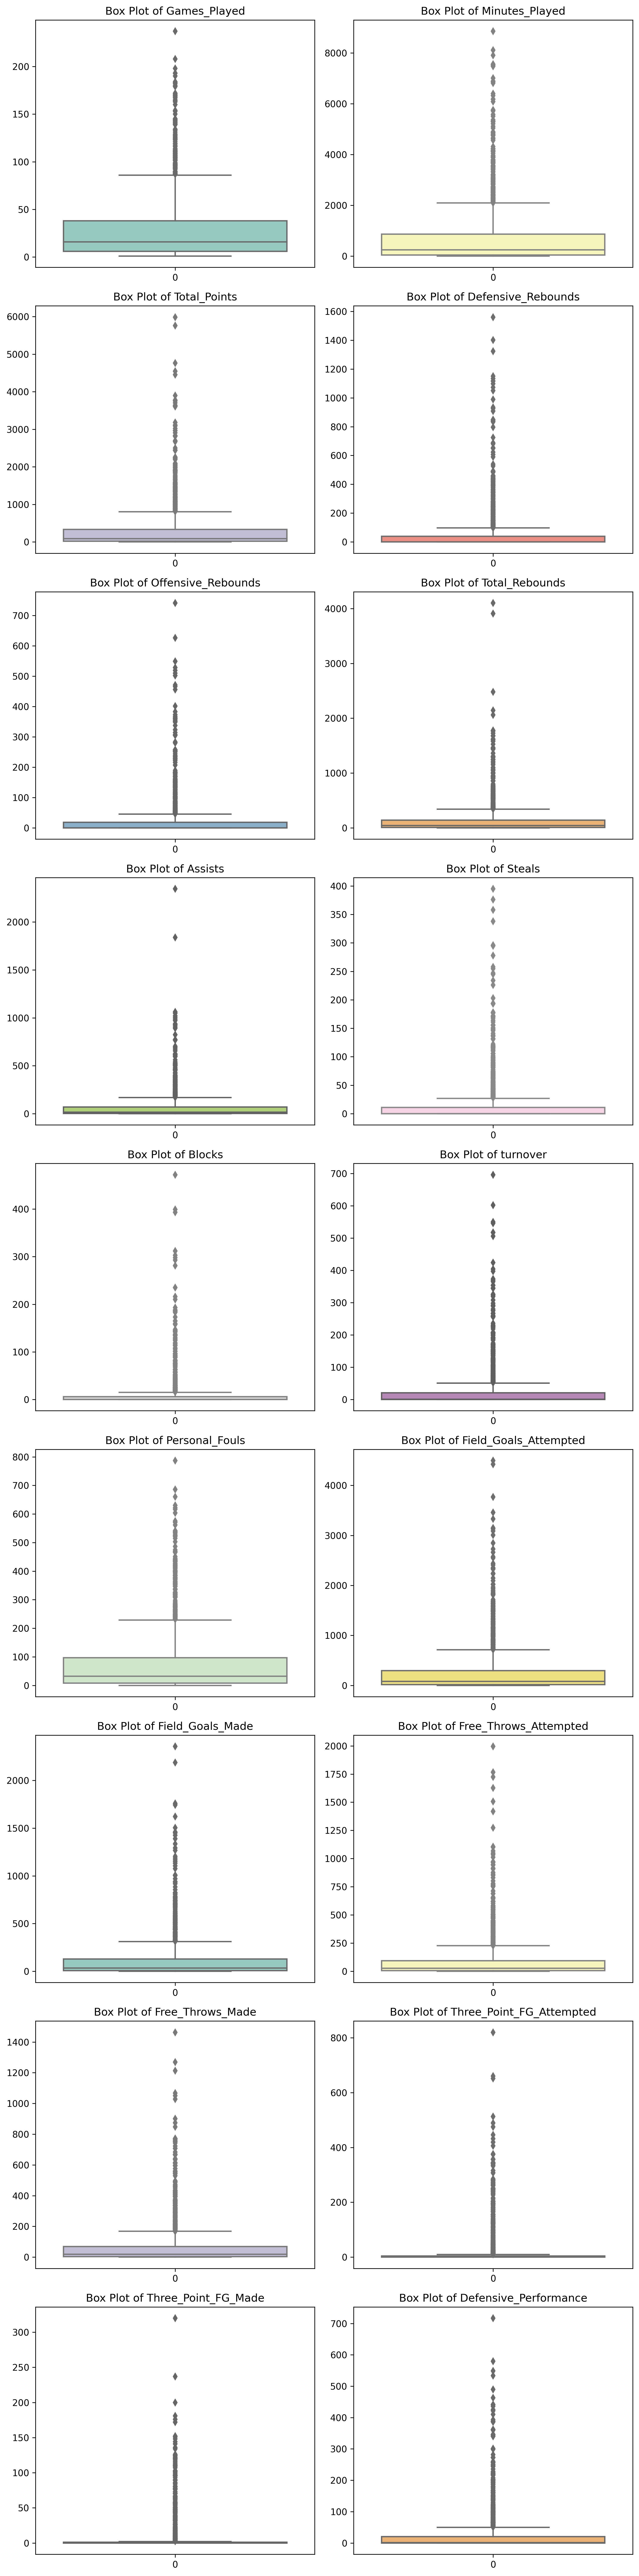

In [ ]:
column_to_exclude = ['player name', 'ilkid', 'League']

all_columns = data.columns

columns = all_columns.drop(column_to_exclude).values

num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(10, 40),dpi = 300)

colors = sns.color_palette("Set3", num_columns)
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(data=data[column], ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(f'Box Plot of {column}')

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ilkid                     2055 non-null   object
 1   League                    2055 non-null   object
 2   Games_Played              2055 non-null   int64 
 3   Minutes_Played            2055 non-null   int64 
 4   Total_Points              2055 non-null   int64 
 5   Defensive_Rebounds        2055 non-null   int64 
 6   Offensive_Rebounds        2055 non-null   int64 
 7   Total_Rebounds            2055 non-null   int64 
 8   Assists                   2055 non-null   int64 
 9   Steals                    2055 non-null   int64 
 10  Blocks                    2055 non-null   int64 
 11  turnover                  2055 non-null   int64 
 12  Personal_Fouls            2055 non-null   int64 
 13  Field_Goals_Attempted     2055 non-null   int64 
 14  Field_Goals_Made        

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ilkid                     2055 non-null   object
 1   League                    2055 non-null   object
 2   Games_Played              2055 non-null   int64 
 3   Minutes_Played            2055 non-null   int64 
 4   Total_Points              2055 non-null   int64 
 5   Defensive_Rebounds        2055 non-null   int64 
 6   Offensive_Rebounds        2055 non-null   int64 
 7   Total_Rebounds            2055 non-null   int64 
 8   Assists                   2055 non-null   int64 
 9   Steals                    2055 non-null   int64 
 10  Blocks                    2055 non-null   int64 
 11  turnover                  2055 non-null   int64 
 12  Personal_Fouls            2055 non-null   int64 
 13  Field_Goals_Attempted     2055 non-null   int64 
 14  Field_Goals_Made        

In [ ]:
data.isna().sum()

ilkid                       0
League                      0
Games_Played                0
Minutes_Played              0
Total_Points                0
Defensive_Rebounds          0
Offensive_Rebounds          0
Total_Rebounds              0
Assists                     0
Steals                      0
Blocks                      0
turnover                    0
Personal_Fouls              0
Field_Goals_Attempted       0
Field_Goals_Made            0
Free_Throws_Attempted       0
Free_Throws_Made            0
Three_Point_FG_Attempted    0
Three_Point_FG_Made         0
player name                 0
Defensive_Performance       0
dtype: int64

In [ ]:
data['Three_Point_FG_Percentage'] = (data['Three_Point_FG_Made']/ data['Three_Point_FG_Attempted']) * 100

In [ ]:
data.isna().sum()

ilkid                           0
League                          0
Games_Played                    0
Minutes_Played                  0
Total_Points                    0
Defensive_Rebounds              0
Offensive_Rebounds              0
Total_Rebounds                  0
Assists                         0
Steals                          0
Blocks                          0
turnover                        0
Personal_Fouls                  0
Field_Goals_Attempted           0
Field_Goals_Made                0
Free_Throws_Attempted           0
Free_Throws_Made                0
Three_Point_FG_Attempted        0
Three_Point_FG_Made             0
player name                     0
Defensive_Performance           0
Three_Point_FG_Percentage    1233
dtype: int64

In [ ]:
data['Three_Point_FG_Percentage'].fillna(0, inplace=True)

In [ ]:
data['Field_Goal_Percentage'] = (data['Field_Goals_Made']/ data['Field_Goals_Attempted']) * 100

In [ ]:
data.isna().sum()

ilkid                         0
League                        0
Games_Played                  0
Minutes_Played                0
Total_Points                  0
Defensive_Rebounds            0
Offensive_Rebounds            0
Total_Rebounds                0
Assists                       0
Steals                        0
Blocks                        0
turnover                      0
Personal_Fouls                0
Field_Goals_Attempted         0
Field_Goals_Made              0
Free_Throws_Attempted         0
Free_Throws_Made              0
Three_Point_FG_Attempted      0
Three_Point_FG_Made           0
player name                   0
Defensive_Performance         0
Three_Point_FG_Percentage     0
Field_Goal_Percentage        43
dtype: int64

In [ ]:
data['Field_Goal_Percentage'].fillna(0, inplace=True)

In [ ]:
data['Free_Throw_Percentage'] = (data['Free_Throws_Made']/ data['Free_Throws_Attempted']) * 100

In [ ]:
data.isna().sum()

ilkid                          0
League                         0
Games_Played                   0
Minutes_Played                 0
Total_Points                   0
Defensive_Rebounds             0
Offensive_Rebounds             0
Total_Rebounds                 0
Assists                        0
Steals                         0
Blocks                         0
turnover                       0
Personal_Fouls                 0
Field_Goals_Attempted          0
Field_Goals_Made               0
Free_Throws_Attempted          0
Free_Throws_Made               0
Three_Point_FG_Attempted       0
Three_Point_FG_Made            0
player name                    0
Defensive_Performance          0
Three_Point_FG_Percentage      0
Field_Goal_Percentage          0
Free_Throw_Percentage        227
dtype: int64

In [ ]:
data['Free_Throw_Percentage'].fillna(0,inplace=True)

In [ ]:
data.isna().sum()

ilkid                        0
League                       0
Games_Played                 0
Minutes_Played               0
Total_Points                 0
Defensive_Rebounds           0
Offensive_Rebounds           0
Total_Rebounds               0
Assists                      0
Steals                       0
Blocks                       0
turnover                     0
Personal_Fouls               0
Field_Goals_Attempted        0
Field_Goals_Made             0
Free_Throws_Attempted        0
Free_Throws_Made             0
Three_Point_FG_Attempted     0
Three_Point_FG_Made          0
player name                  0
Defensive_Performance        0
Three_Point_FG_Percentage    0
Field_Goal_Percentage        0
Free_Throw_Percentage        0
dtype: int64

In [ ]:
outliers_condition = ((data['Field_Goal_Percentage'] > 90) |
                      (data['Field_Goal_Percentage'] == 0) |
                      (data['Three_Point_FG_Percentage'] > 90) |
                      (data['Three_Point_FG_Percentage'] == 0) |
                      (data['Free_Throw_Percentage'] == 0))

data = data[~outliers_condition]

In [ ]:
correlation_matrix = data.corr()
fig = go.Figure(data=go.Heatmap(z = correlation_matrix.values, x = correlation_matrix.columns, y=correlation_matrix.index, colorscale='Oranges',))

fig.update_layout(title='Correlation Heatmap', xaxis_title='Features',yaxis_title='Features', height=1000, template='plotly_dark')
fig.show()

<ipython-input-268-e280c27b4b77>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
data.drop(columns=['League','ilkid','player name','Defensive_Performance','Three_Point_FG_Made','Three_Point_FG_Attempted','Free_Throws_Made','Free_Throws_Attempted','Field_Goals_Made','Field_Goals_Attempted'],
        inplace=True)

<ipython-input-269-e144610f8a6f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data

,Games_Played,Minutes_Played,Total_Points,Defensive_Rebounds,Offensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,turnover,Personal_Fouls,Three_Point_FG_Percentage,Field_Goal_Percentage,Free_Throw_Percentage
2,15,415,195,18,5,23,35,7,1,22,37,28.571429,36.898396,95.555556
10,20,679,256,53,14,67,103,32,2,44,41,32.710280,36.956522,85.000000
11,6,62,22,3,3,6,6,3,0,3,3,50.000000,32.142857,100.000000
13,102,2958,1747,356,181,537,265,71,22,198,281,31.690141,48.501742,74.340528
14,193,5038,1902,323,120,443,656,172,19,257,533,39.814815,45.639720,82.913165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,10,21,22,1,0,1,3,0,0,3,0,66.666667,40.000000,80.000000
2032,13,348,158,13,17,30,34,10,4,23,35,23.076923,39.864865,90.243902
2035,41,892,237,67,18,85,167,44,1,63,97,23.404255,35.555556,84.615385
2038,143,5297,3022,490,257,747,463,177,96,298,352,20.895522,54.401030,72.699387


In [ ]:
X = data.drop('Total_Points',axis = 1)
y = data['Total_Points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
row, col = X_train.shape
print("X_train have",row,"rows and",col,"columns.")
row, col = X_test.shape
print("X_test have",row,"rows and",col,"columns.")

X_train have 425 rows and 13 columns.
X_test have 107 rows and 13 columns.


In [ ]:
model = LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(data.drop('Total_Points', axis=1), data['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.15
Best random state: 42
Best R2 score: 0.9617458093004064


In [ ]:
X_train, X_test , y_train, y_test = train_test_split(data.drop('Total_Points', axis=1), data['Total_Points'], test_size=.2, random_state=43)

LRmodel = LinearRegression(fit_intercept=True)
LRmodel.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = LRmodel.predict(X_test)
r2_score(y_test, y_pred)

0.9090168036897182

In [ ]:
model = KNeighborsRegressor()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(data.drop('Total_Points', axis=1), data['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.15
Best random state: 42
Best R2 score: 0.9473436806122452


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Total_Points', axis=1), data['Total_Points'], test_size=0.2, random_state=0)

KNNmodel = KNeighborsRegressor()

param_grid = {
    'n_neighbors': range(3,11,2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=KNNmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.90314379945138
Best hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
R2 score on test set: 0.8640003666422531


In [ ]:
model = DecisionTreeRegressor()

test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(data.drop('Total_Points', axis=1), data['Total_Points'], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.15
Best random state: 1
Best R2 score: 0.9270763730080465


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Total_Points', axis=1), data['Total_Points'], test_size=0.15, random_state=100)

DTRmodel = DecisionTreeRegressor()
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [15, 20, 25, 30, 35],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(estimator=DTRmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.8650436087401001
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 15}
R2 score on test set: 0.8695845250899629


In [ ]:
test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(data.drop('Total_Points', axis=1), data['Total_Points'], test_size=test_size, random_state=random_state)
        model = RandomForestRegressor(n_estimators=100, max_depth=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.15
Best random state: 1
Best R2 score: 0.9512468860027868


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Total_Points', axis=1), data['Total_Points'], test_size=0.1, random_state=0)

RFRmodel = RandomForestRegressor()

param_grid = {
    'n_estimators': range(80,160,10),
    'max_depth': range(1,20,2),
}

grid_search = GridSearchCV(estimator=RFRmodel, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {best_r2_score}")
print(f"Best hyperparameters: {best_params}")

best_RFRmodel = grid_search.best_estimator_
y_pred = best_RFRmodel.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.8919171429439837
Best hyperparameters: {'max_depth': 13, 'n_estimators': 80}
R2 score on test set: 0.8904788213123209


In [ ]:
y_final = best_RFRmodel.predict(X)

comparison_df = pd.DataFrame({'Actual': y, 'Predicted': y_final})

fig_scatter = px.scatter(comparison_df, x='Actual', y='Predicted', color='Actual',
                         template='plotly_dark', title='Comparison of Actual vs. Predicted',
                         labels={'Actual': 'Actual Points', 'Predicted': 'Predicted Points'})

fig_hist = px.histogram(comparison_df, x=['Actual', 'Predicted'], nbins=30, barmode='overlay',
                        template='plotly_dark', title='Distribution of Actual and Predicted Points',
                        labels={'value': 'Points', 'variable': 'Values'}, color_discrete_sequence=['#185ADB', '#FC5C9C'])

residuals = y - y_final
fig_residual = go.Figure(data=go.Scatter(x=y_final, y=residuals, mode='markers',
                                        marker=dict(color='orangered'), showlegend=False))
fig_residual.add_shape(go.layout.Shape(type='line', x0=min(y_final), x1=max(y_final), y0=0, y1=0,
                                      line=dict(color='orange', dash='dash')))
fig_residual.update_layout(template='plotly_dark', title='Residual Plot',
                           xaxis_title='Predicted Values', yaxis_title='Residuals')

fig_line = go.Figure()
fig_line.add_trace(go.Scatter(x=y, y=y, mode='lines', line=dict(color='#98DFD6'), name='Ideal Line'))
fig_line.add_trace(go.Scatter(x=y, y=y_final, mode='markers', marker=dict(color='orangered'), name='Predicted Values'))
fig_line.add_trace(go.Scatter(x=np.unique(y), y=np.poly1d(np.polyfit(y, y_final, 1))(np.unique(y)),
                             mode='lines', line=dict(color='#FFDD83'), name='Regression Line'))
fig_line.update_layout(template='plotly_dark', title='Predicted vs. True Line Plot',
                       xaxis_title='True Values', yaxis_title='Predicted Values')

fig_scatter.show()
fig_hist.show()
fig_residual.show()
fig_line.show()